In [1]:
import numpy as np
from keras import *
import matplotlib.pyplot as plt
from uttils import *
import tensorflow as tf
%matplotlib inline
file_name = "Group Superannuation Balanced Fund.xlsx"
number_of_prev_data = 30

Using TensorFlow backend.


In [2]:

Input = layers.Input(shape = (number_of_prev_data,))
#X = layers.LSTM(15, name = "LSTM0", return_sequences = True)(Input)
#X = layers.LSTM(15, name = "LSTM1")(X)
X = layers.Dense(30)(Input)
X = layers.Dense(15)(X)
X = layers.Dense(35)(X)
X = layers.Dense(1)(X)
model = Model(inputs = Input, outputs = X)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 35)                560       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 36        
Total params: 1,991
Trainable params: 1,991
Non-trainable params: 0
_________________________________________________________________


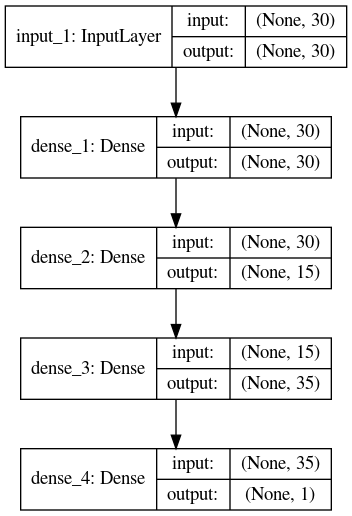

In [3]:
utils.plot_model(model, show_shapes = True)

In [4]:
def metric(y_true, y_pred):
    return 100*((1 - y_pred/y_true)**2 )

In [5]:
opt = optimizers.Adam()
loss = losses.MeanAbsolutePercentageError()
model.compile(loss = 'mape', optimizer = opt, metrics = ['mape'])

(805, 1)


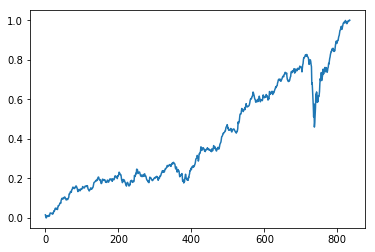

In [6]:
scaler, X, Y = data_extractor("Data_Set/"+file_name, number_of_prev_data)
print(Y.shape)
X = X.reshape((X.shape[0], X.shape[1]))
Y = Y.reshape((Y.shape[0], 1))
X_train = X
Y_train = Y
plt.plot(np.append(X[0],Y))

In [7]:
F = model.fit(X_train, Y_train, batch_size = 1, epochs = 1, validation_split = 0.1, shuffle = True)

Train on 724 samples, validate on 81 samples
Epoch 1/1
724/724 [==============================] - 1s 2ms/step - loss: 11.0389 - mape: 11.0389 - val_loss: 2.8759 - val_mape: 2.8759


805/805 [==============================] - 0s 21us/step
[6.718807850120971, 6.718808174133301]


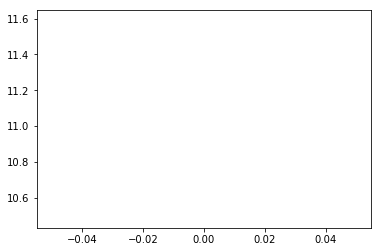

In [8]:
plt.plot(F.history['mape'])
Predict  = model.predict(X_train)
model.save('Models/7pm_14_08_2020'+file_name +'.h5')
results = model.evaluate(X_train, Y_train)
print(results)

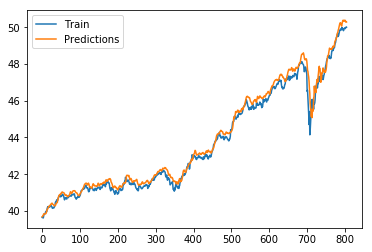

In [9]:
plt.plot(scaler.inverse_transform(Y_train),label = 'Train')
plt.plot(scaler.inverse_transform(Predict), label = 'Predictions')
plt.legend()
